In [2]:
import numpy as np
import matplotlib.pyplot as plt
from poles_roots.aaa import AAA
from tqdm import tqdm
plt.style.use(['science','ieee'])
plt.rcParams['font.size'] = 13

For now we only consider right triangle of different sizes.

In [4]:
side_length = 1

points = np.array([[0,0], [side_length, 0], [0, side_length]])

def linspace_in_right_triangle(num, side_length):
    tmp = np.linspace(0, side_length, num=int(num**0.5))
    [xx, yy] = np.meshgrid(tmp, tmp)
    mask = xx + yy > side_length
    xx = xx[~mask]
    yy = yy[~mask]
    return xx.ravel(), yy.ravel()

In [3]:
rng = np.random.default_rng(123456)
f_iterations = []
log_deriv_iterations = []
f_pole_error = []
log_deriv_pole_error = []
orders = [1, 2, 4, 8]

for order in orders:
    f_iterations_tmp = []
    log_deriv_iterations_tmp = []
    f_pole_error_tmp = []
    log_deriv_pole_error_tmp = []
    for _ in tqdm(range(1000)):
        # generate random pole
        re_pole = rng.uniform(0, side_length)
        im_pole = rng.uniform(0, side_length)
        if re_pole + im_pole > side_length:
            re_pole = side_length - re_pole
            im_pole = side_length - im_pole   
        
        pole = re_pole+im_pole*1j
        def f(z):
            return 1/(z-pole)**order
        def f_prime(z):
            return -order/(z-pole)**(order+1)
        
        x, y = linspace_in_right_triangle(1000, side_length)
        Z_in = x+y*1j        
        n_actual = x.size
        
        f_res = AAA(f(Z_in), Z_in)
        log_deriv_res = AAA(f_prime(Z_in)/f(Z_in), Z_in)
        
        f_iterations_tmp.append(f_res.weights.size)
        log_deriv_iterations_tmp.append(log_deriv_res.weights.size)
        f_pole_error_tmp.append(np.min(np.abs(f_res.poles - pole)))
        log_deriv_pole_error_tmp.append(np.min(np.abs(log_deriv_res.poles - pole)))
        
        # generate random points to sample the approximation at
        re_sample = rng.uniform(0, side_length, size=10)
        im_sample = rng.uniform(0, side_length, size=10)
        mask = re_sample + im_sample > side_length
        re_sample[mask] = side_length - re_sample[mask]
        im_sample[mask] = side_length - im_sample[mask]
        sample = re_sample + im_sample*1j
    
    f_iterations.append(f_iterations_tmp)
    log_deriv_iterations.append(log_deriv_iterations_tmp)
    f_pole_error.append(f_pole_error_tmp)
    log_deriv_pole_error.append(log_deriv_pole_error_tmp)

100%|██████████| 1000/1000 [00:35<00:00, 28.48it/s]


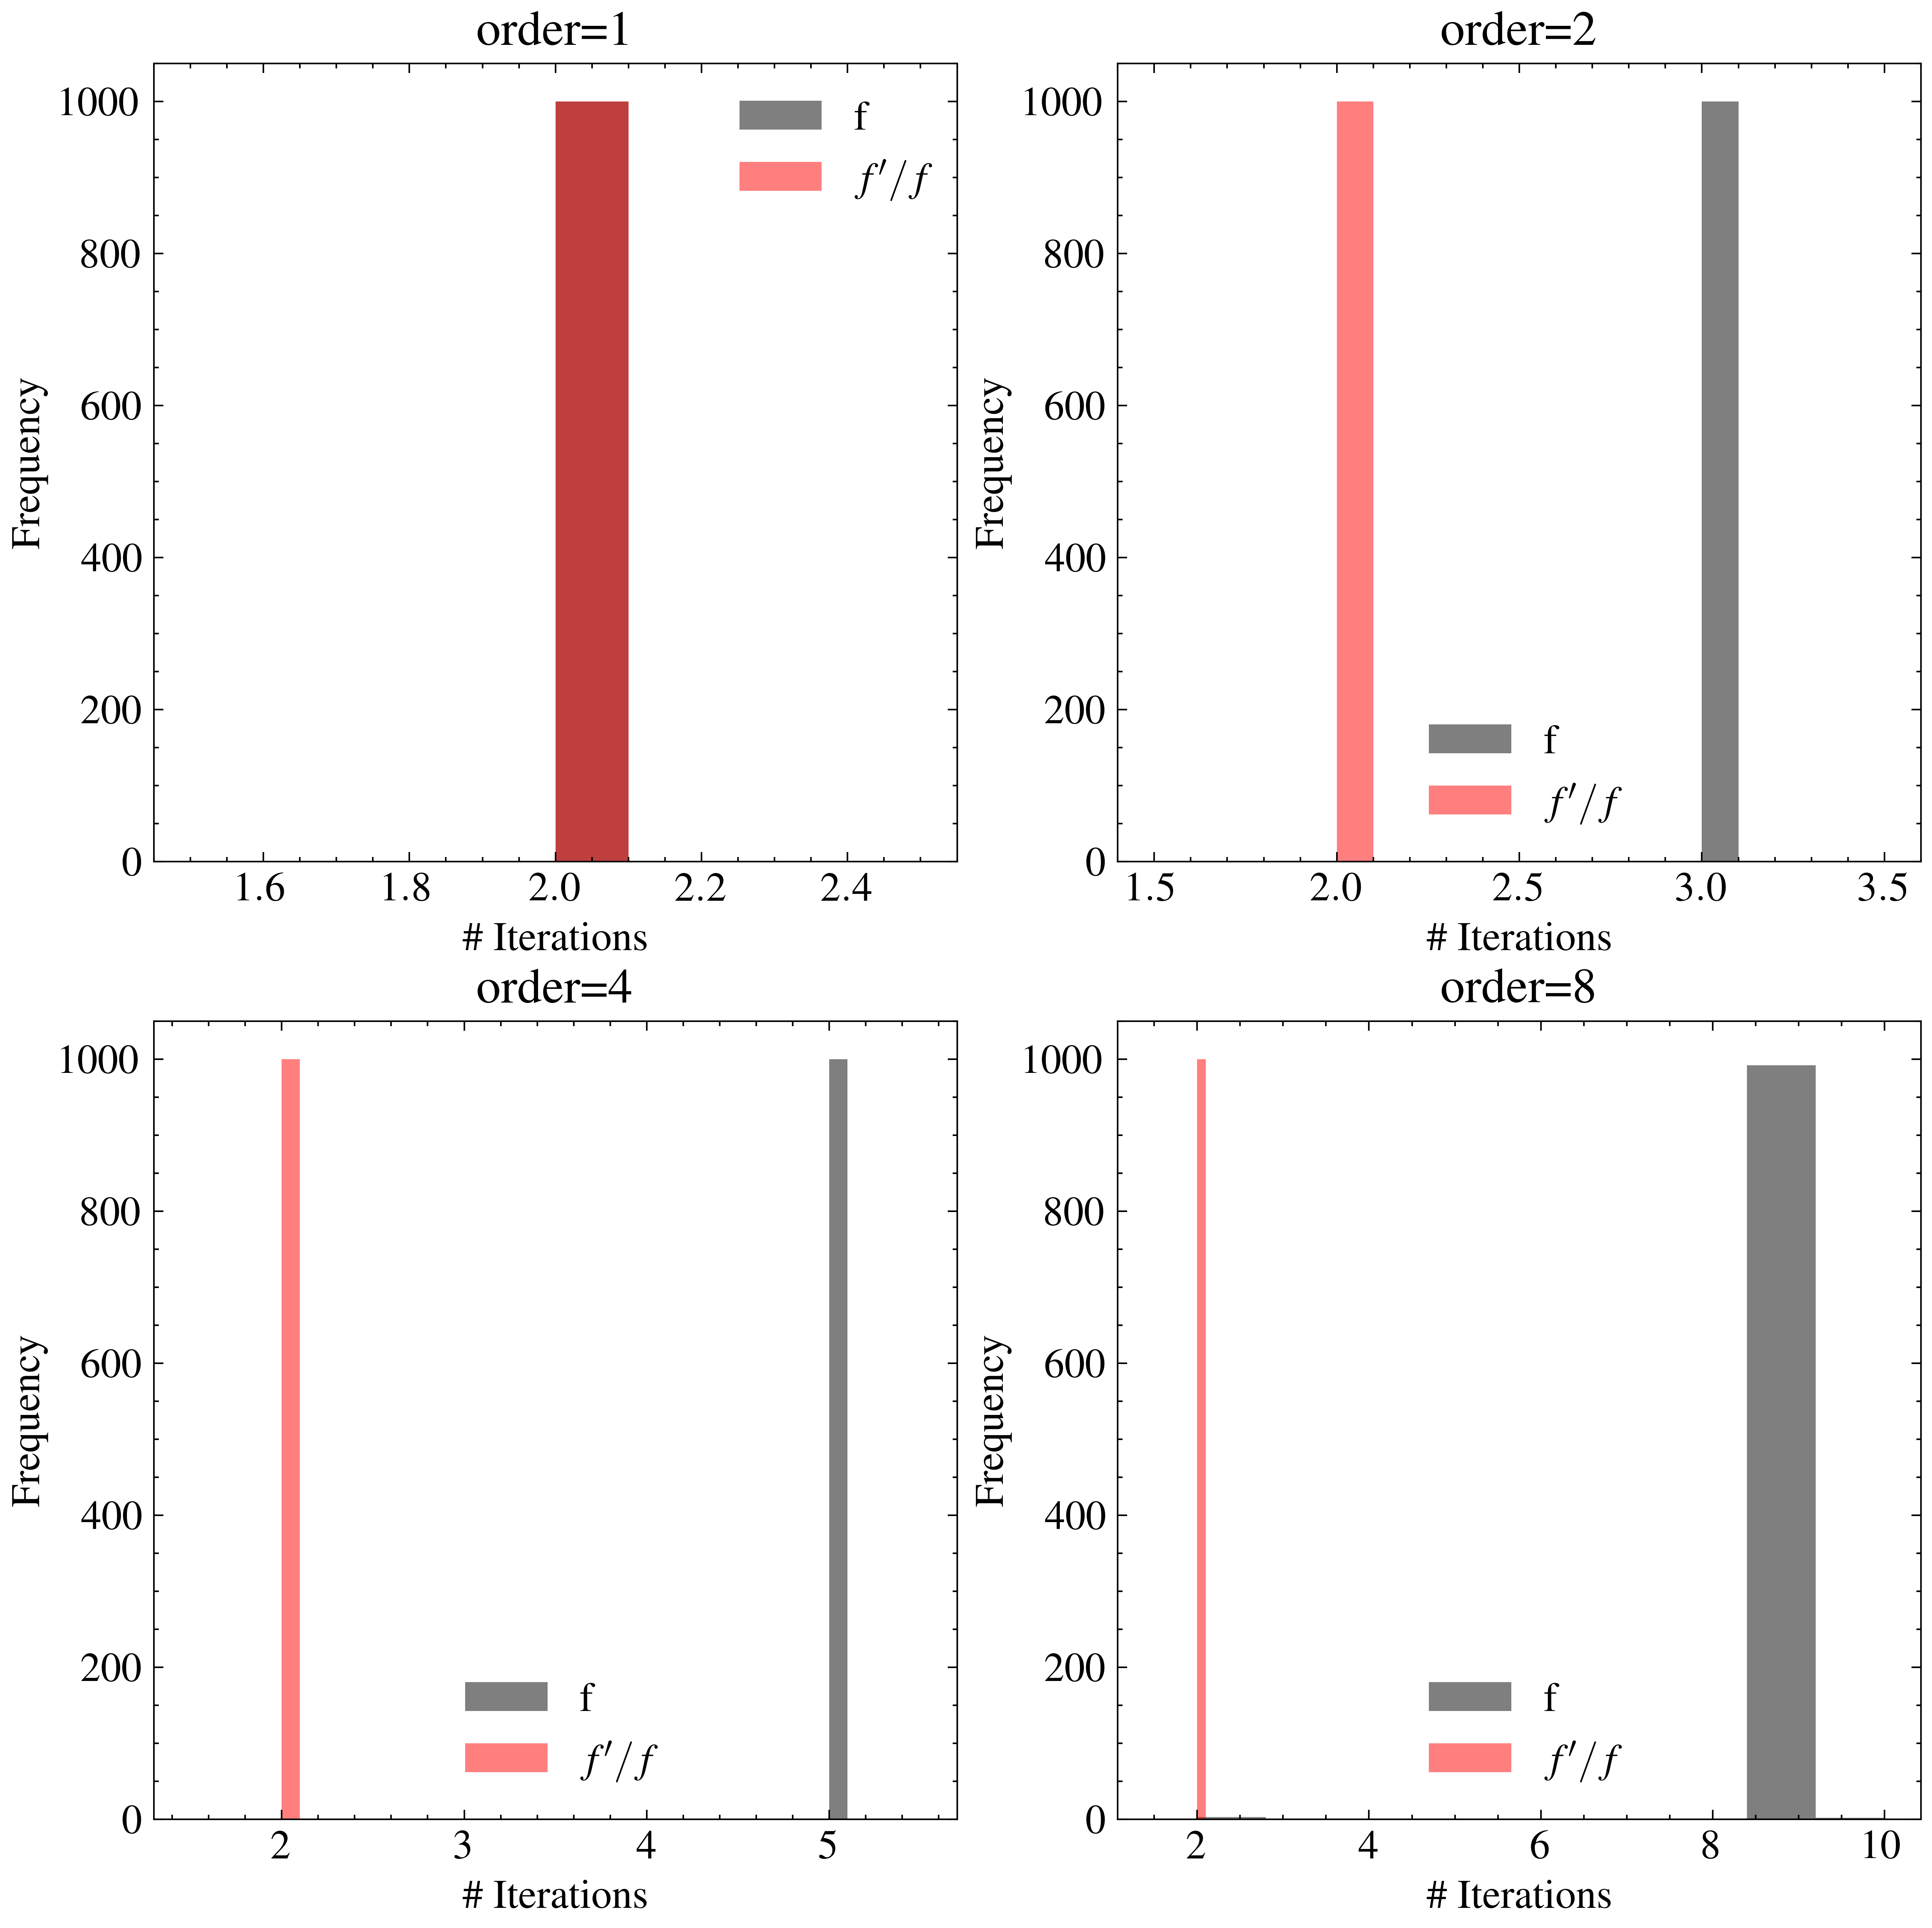

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for i, (ax, order) in enumerate(zip(axs.ravel(), orders)):
    ax.hist(f_iterations[i], alpha=0.5, label="f")
    ax.hist(log_deriv_iterations[i], alpha=0.5, label=r"$f^\prime/f$")
    ax.set_xlabel(r"\# Iterations")
    ax.set_ylabel("Frequency")
    ax.set_title(f"{order=}")
    ax.legend()
plt.savefig("figures/AAA_function_choice_iterations.pdf")

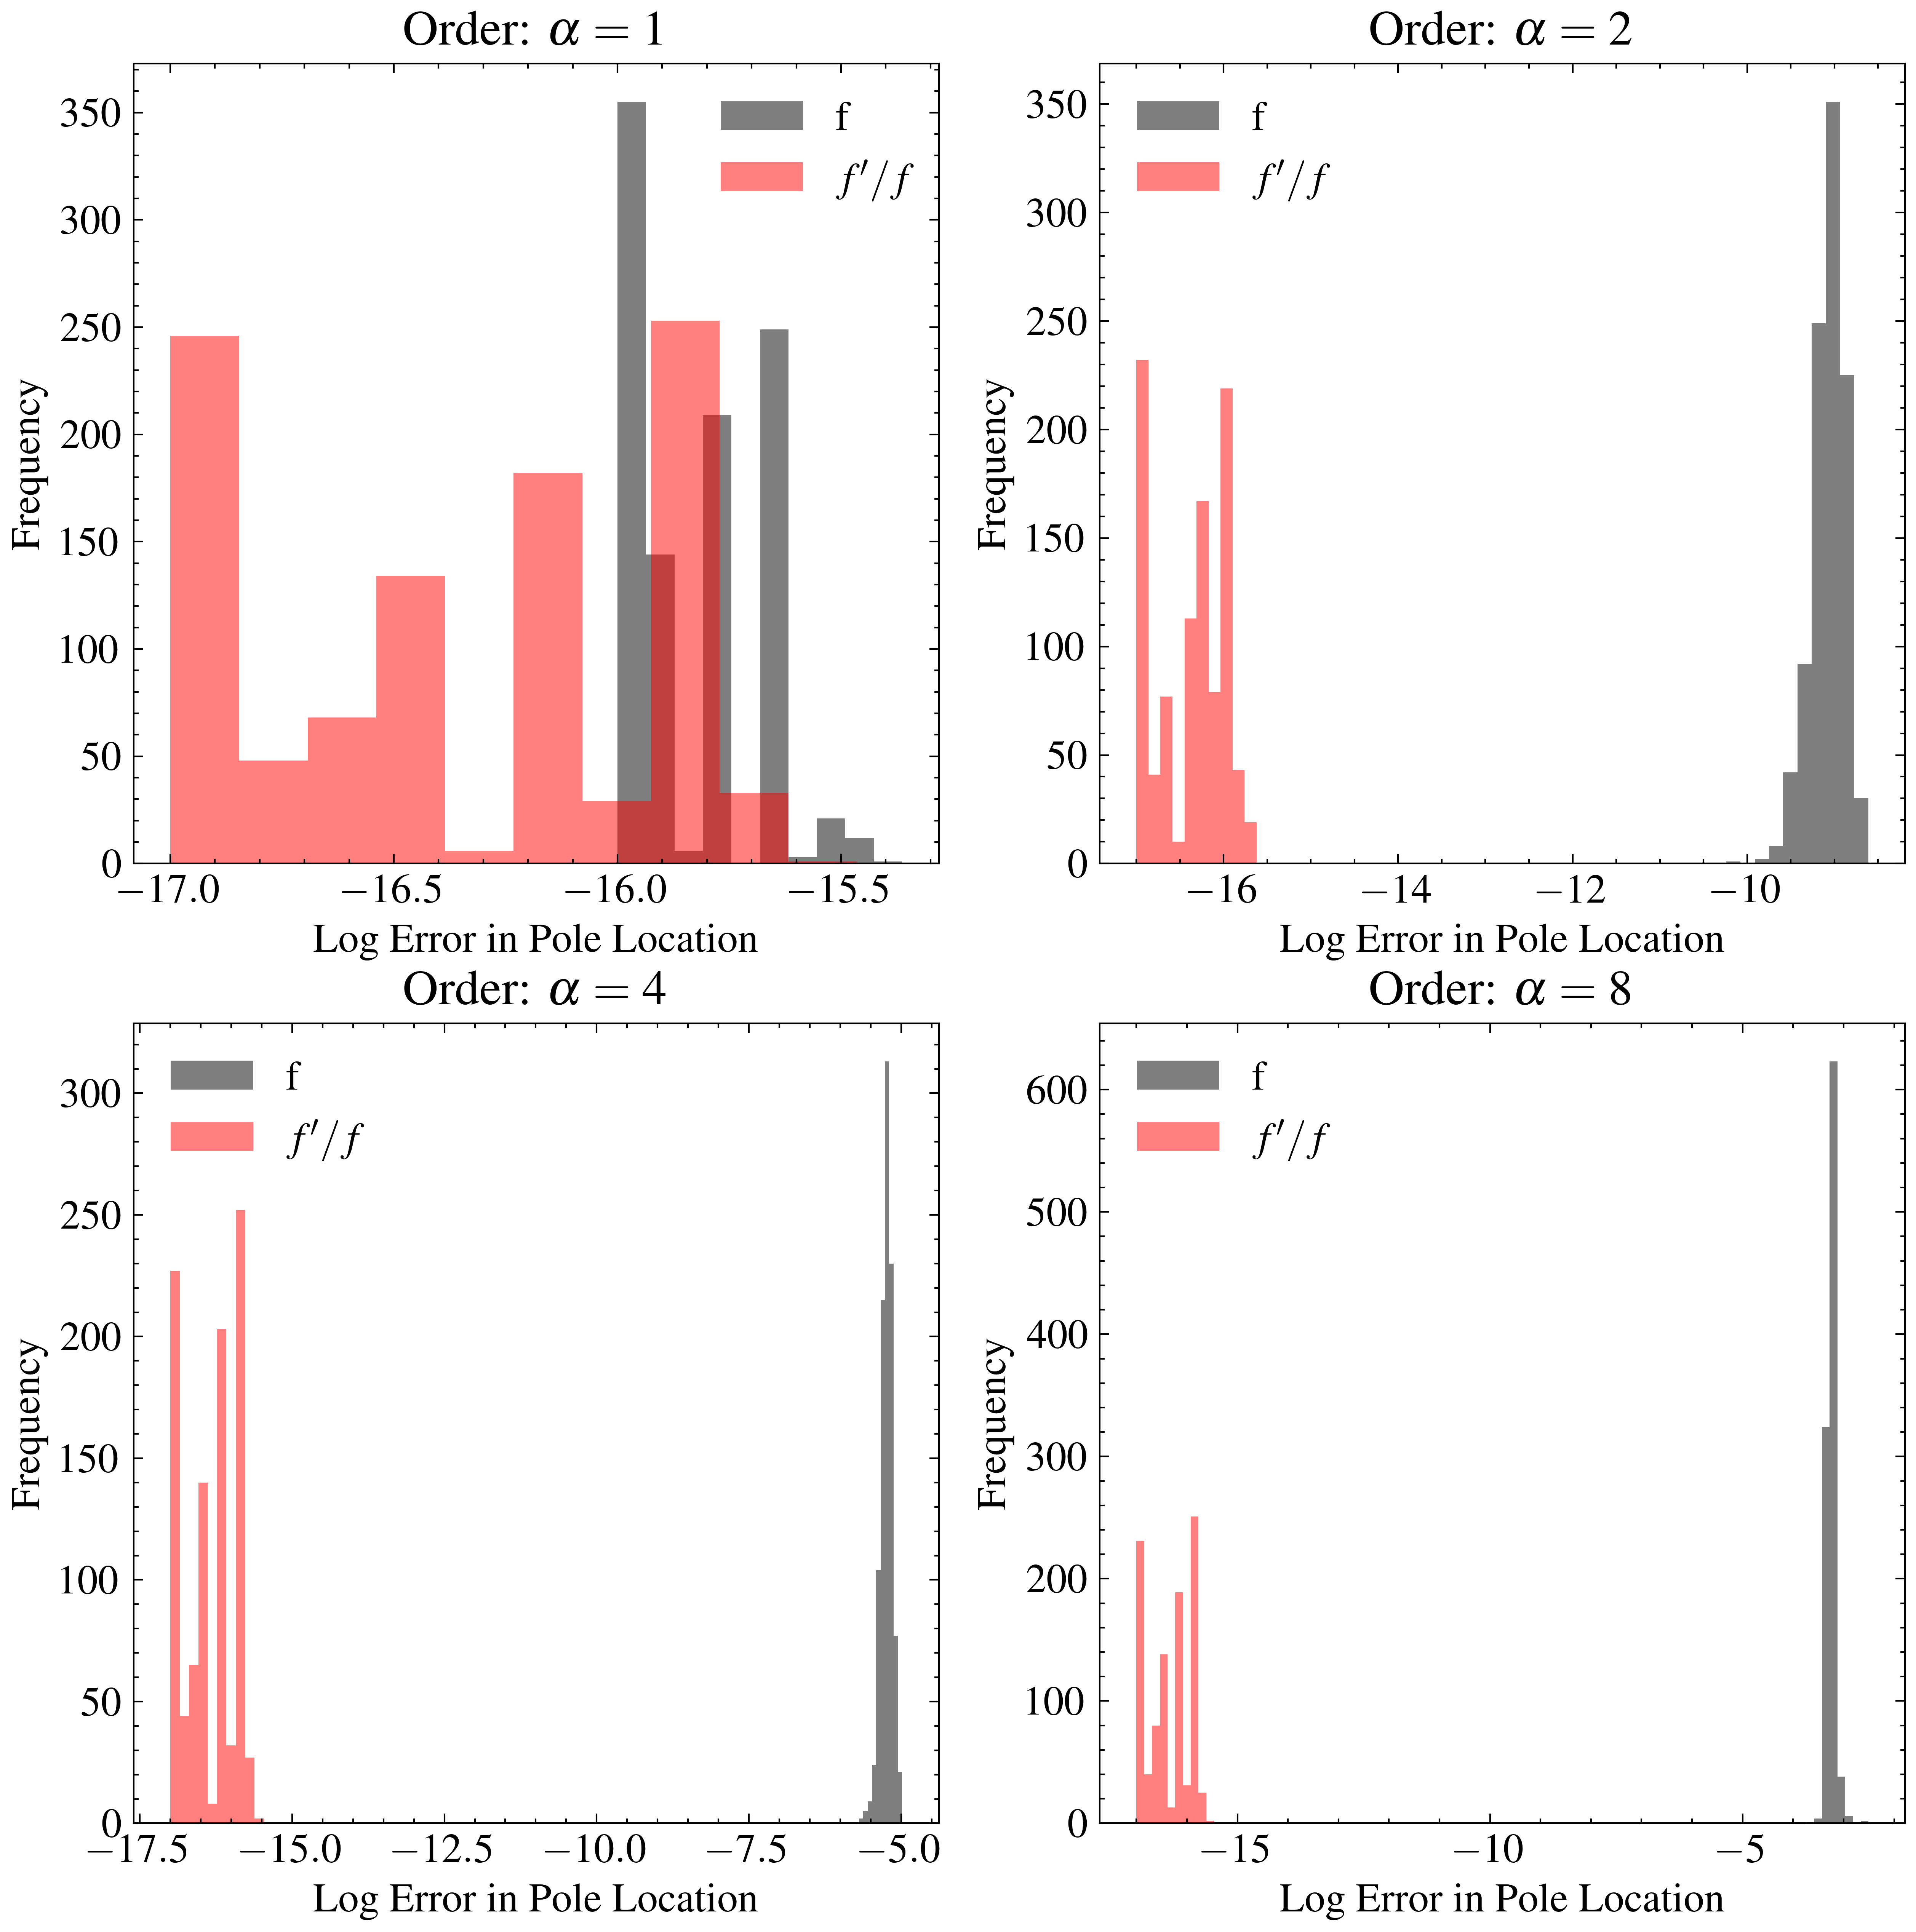

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for i, (ax, order) in enumerate(zip(axs.ravel(), orders)):
    ax.hist(np.log10(np.asarray(f_pole_error[i])+1e-16), alpha=0.5, label="f")
    ax.hist(np.log10(np.asarray(log_deriv_pole_error[i])+1e-17), alpha=0.5, label=r"$f^\prime/f$")
    ax.set_xlabel("Log Error in Pole Location")
    ax.set_ylabel("Frequency")
    ax.set_title(rf"Order: $\alpha={order}$")
    ax.legend()
plt.savefig("figures/AAA_function_choice_error.pdf")

In [6]:
rng = np.random.default_rng(123456)
f_iterations = []
log_deriv_iterations = []
f_pole_error = []
log_deriv_pole_error = []
orders = [1, 2, 4, 8]

for order in orders:
    f_iterations_tmp = []
    log_deriv_iterations_tmp = []
    f_pole_error_tmp = []
    log_deriv_pole_error_tmp = []
    for _ in tqdm(range(1000)):
        # generate random pole
        re_pole = rng.uniform(0, side_length)
        im_pole = rng.uniform(0, side_length)
        if re_pole + im_pole > side_length:
            re_pole = side_length - re_pole
            im_pole = side_length - im_pole   
        
        pole = re_pole+im_pole*1j
        def f(z):
            return (z-pole)**order
        def f_prime(z):
            return order*(z-pole)**(order-1)
        
        x, y = linspace_in_right_triangle(1000, side_length)
        Z_in = x+y*1j        
        n_actual = x.size
        
        f_res = AAA(f(Z_in), Z_in)
        log_deriv_res = AAA(f_prime(Z_in)/f(Z_in), Z_in)
        
        f_iterations_tmp.append(f_res.weights.size)
        log_deriv_iterations_tmp.append(log_deriv_res.weights.size)
        f_pole_error_tmp.append(np.min(np.abs(f_res.roots - pole)))
        log_deriv_pole_error_tmp.append(np.min(np.abs(log_deriv_res.poles - pole)))
        
        # generate random points to sample the approximation at
        re_sample = rng.uniform(0, side_length, size=10)
        im_sample = rng.uniform(0, side_length, size=10)
        mask = re_sample + im_sample > side_length
        re_sample[mask] = side_length - re_sample[mask]
        im_sample[mask] = side_length - im_sample[mask]
        sample = re_sample + im_sample*1j
    
    f_iterations.append(f_iterations_tmp)
    log_deriv_iterations.append(log_deriv_iterations_tmp)
    f_pole_error.append(f_pole_error_tmp)
    log_deriv_pole_error.append(log_deriv_pole_error_tmp)

100%|██████████| 1000/1000 [00:42<00:00, 23.59it/s]


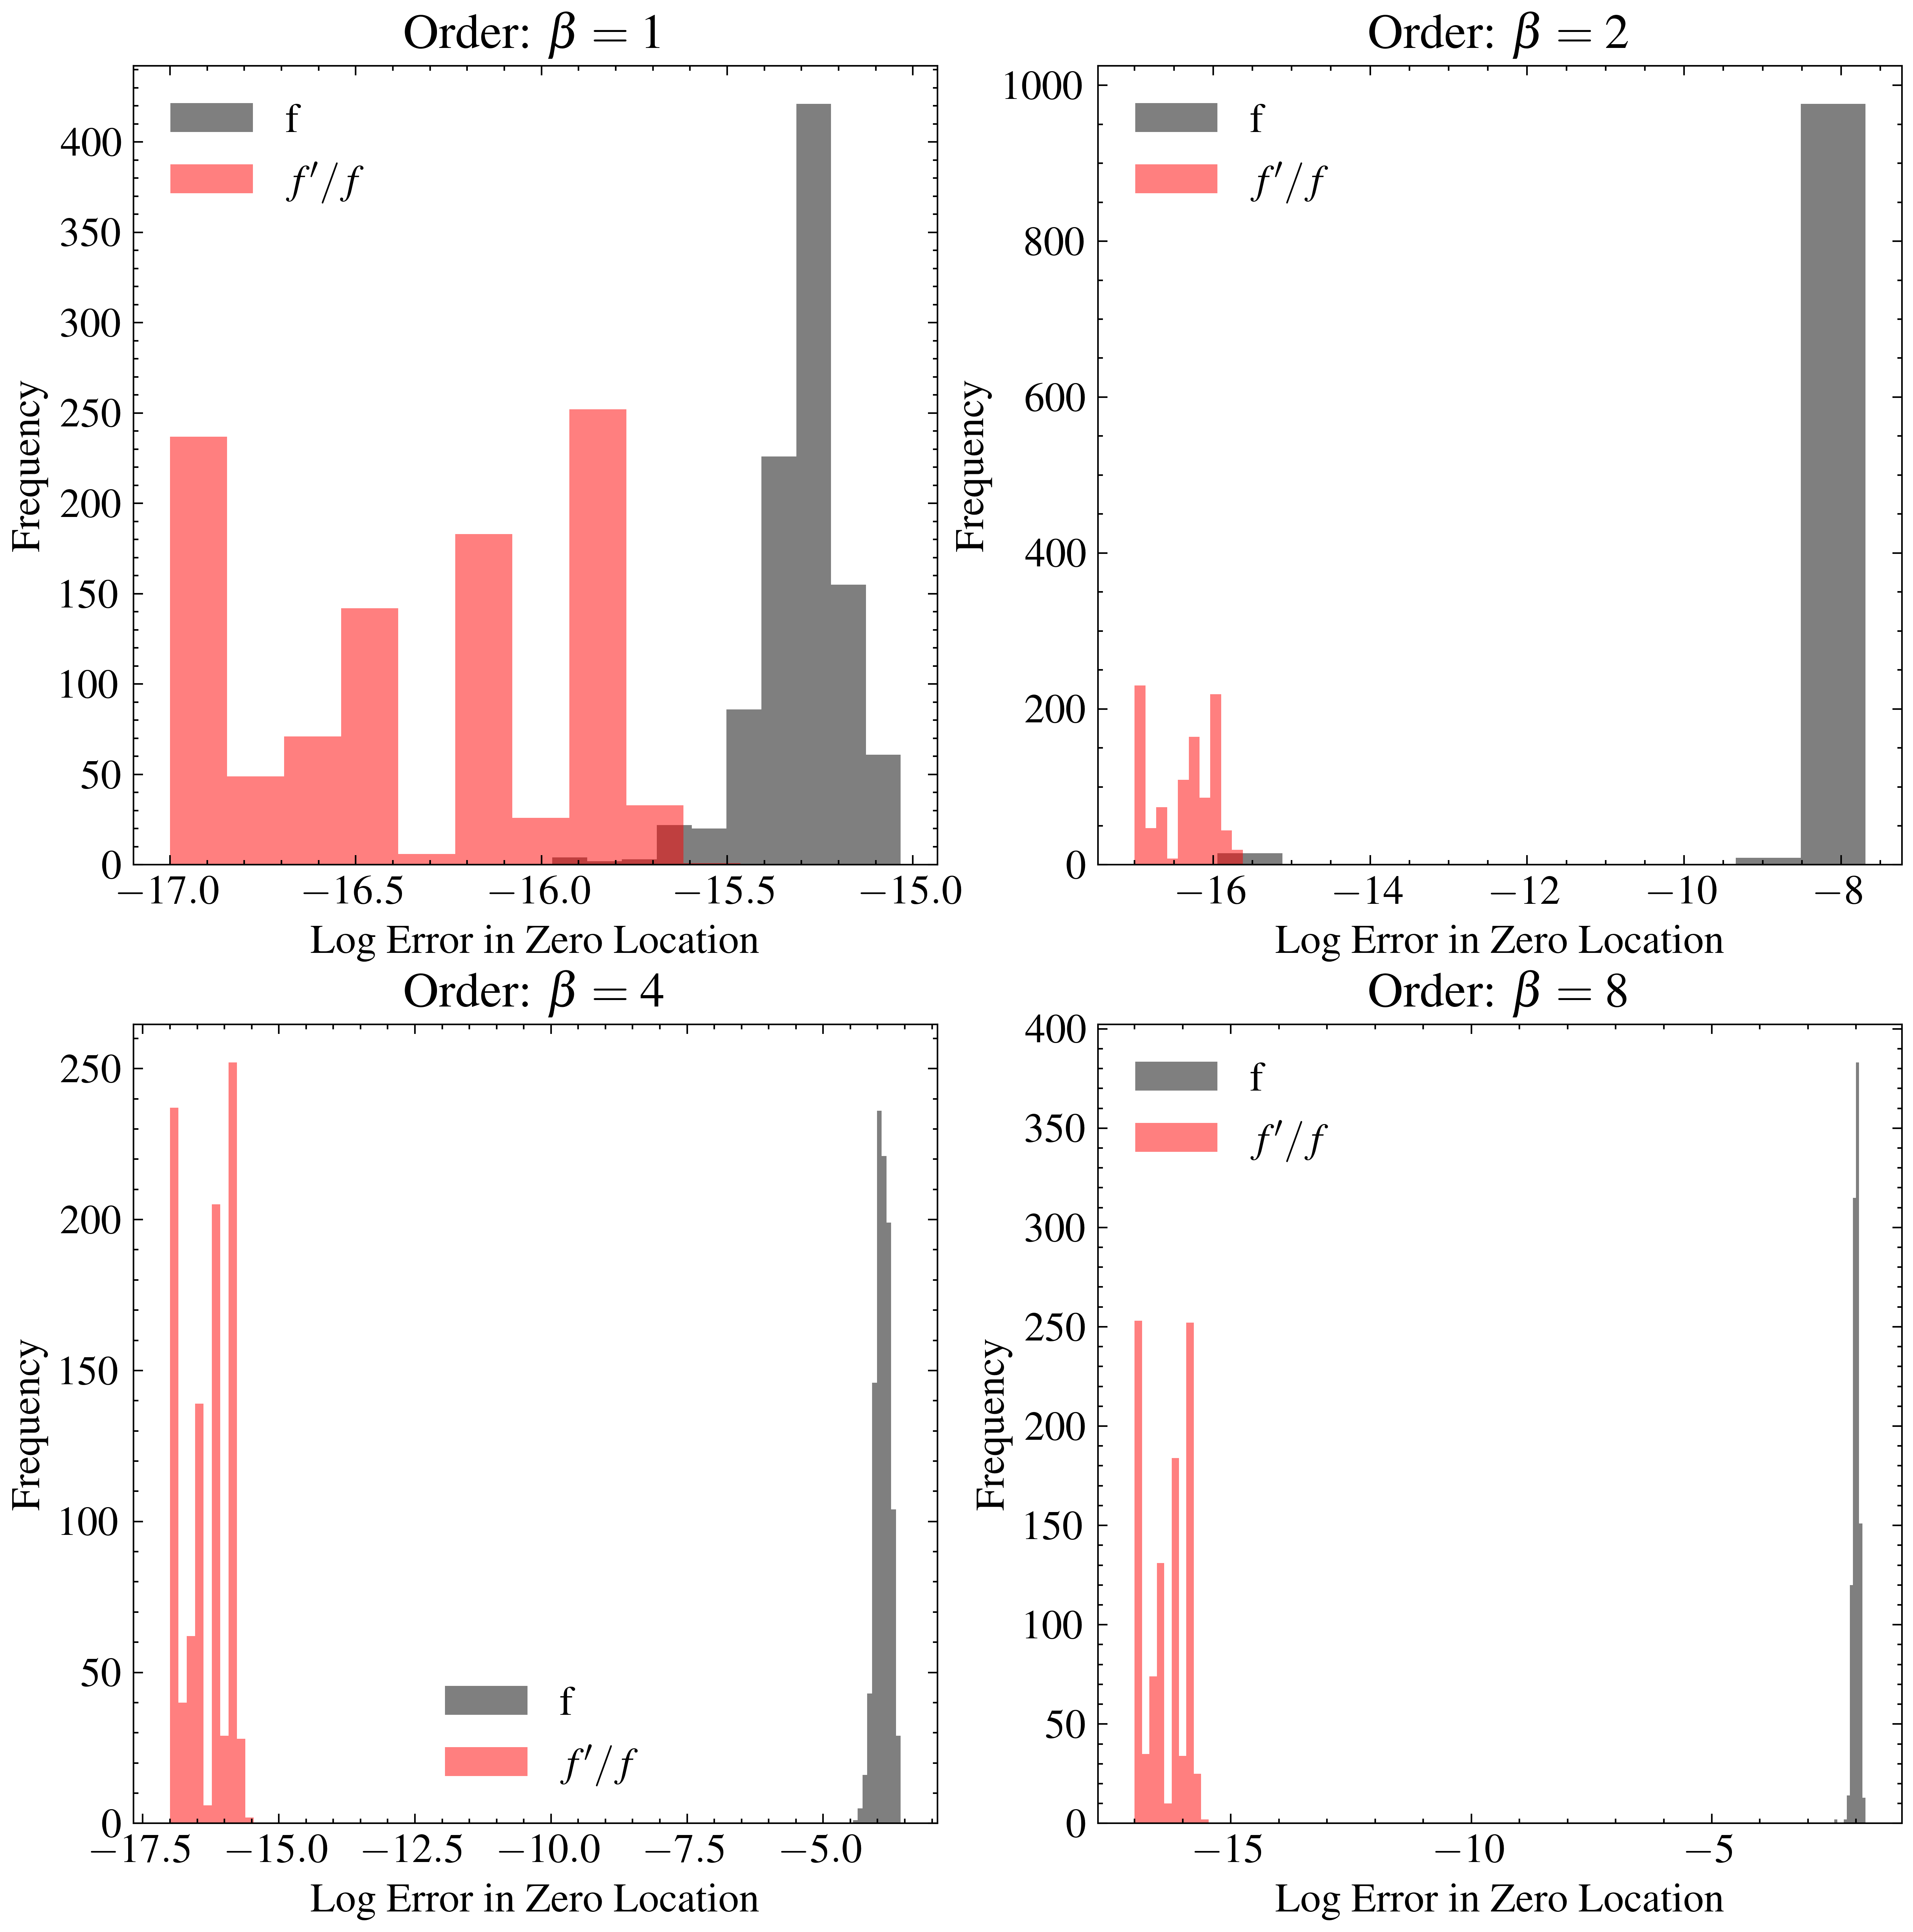

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for i, (ax, order) in enumerate(zip(axs.ravel(), orders)):
    ax.hist(np.log10(np.asarray(f_pole_error[i])+1e-16), alpha=0.5, label="f")
    ax.hist(np.log10(np.asarray(log_deriv_pole_error[i])+1e-17), alpha=0.5, label=r"$f^\prime/f$")
    ax.set_xlabel("Log Error in Zero Location")
    ax.set_ylabel("Frequency")
    ax.set_title(rf"Order: $\beta={order}$")
    ax.legend()
plt.savefig("figures/AAA_function_choice_error_zeros.pdf")